In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Here we have used SIPRI (STOCKHOLM INTERNATIONAL PEACE RESEARCH INSTITUTE) Data as Source 
# Read the military expenditure data of Last Decade

military_spending_in_usd = pd.read_csv("~/Python_Project/military_expenditure_in_usd.csv")

In [3]:
#Inspect first few rows of the data 

military_spending_in_usd.head()

,Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region,Continent
0,Algeria,3946,5172,5281,5671,8652,9326,10162,9724,10413,10217,North Africa,Africa
1,Libya,639,1100,. .,. .,. .,2987,3965,3756,. .,. .,North Africa,Africa
2,Morocco,2408,2945,3055,3161,3343,3403,4066,4049,3268,3327,North Africa,Africa
3,Tunisia,491,579,565,571,715,681,759,908,979,976,North Africa,Africa
4,Angola,2032,3164,3311,3501,3639,4145,6091,6842,3608,2824,Sub-Saharan,Africa


In [4]:
# Replace the non-numeric data with NaN (Not a Number) 

military_spending_in_usd = military_spending_in_usd.replace(". .",np.nan)
military_spending_in_usd = military_spending_in_usd.replace("xxx",np.nan)

In [5]:
# Check how much data is non-null in all the columns 

military_spending_in_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 13 columns):
Country      173 non-null object
2007         148 non-null object
2008         154 non-null object
2009         151 non-null object
2010         150 non-null object
2011         147 non-null object
2012         152 non-null object
2013         152 non-null object
2014         152 non-null object
2015         148 non-null object
2016         145 non-null object
Region       173 non-null object
Continent    173 non-null object
dtypes: object(13)
memory usage: 17.6+ KB


In [6]:
# Remove the rows which contains NA

military_spending_in_usd = military_spending_in_usd.dropna(axis=0,how='any')

In [7]:
# Check if all the values are non-null in the dataset

military_spending_in_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 169
Data columns (total 13 columns):
Country      132 non-null object
2007         132 non-null object
2008         132 non-null object
2009         132 non-null object
2010         132 non-null object
2011         132 non-null object
2012         132 non-null object
2013         132 non-null object
2014         132 non-null object
2015         132 non-null object
2016         132 non-null object
Region       132 non-null object
Continent    132 non-null object
dtypes: object(13)
memory usage: 14.4+ KB


In [8]:
# Convert the numerical data into numeric data type from object

military_spending_in_usd.loc[:,'2007':'2016'] = military_spending_in_usd.loc[:,'2007':'2016'].apply(pd.to_numeric)

In [9]:
# Set the row index as country name as it is unique identifier

military_spending_in_usd = military_spending_in_usd.set_index('Country')

In [10]:
# Convert military spending data from millions to billion dollars

military_spending_in_usd.loc[:,'2007':'2016'] = military_spending_in_usd.loc[:,'2007':'2016']/1000

In [11]:
# Create another dataframe which has Total Worldwide military spending for all the years

military_spending_data = military_spending_in_usd.loc[:,'2007':'2016']
pd.options.mode.chained_assignment = None 
military_spending_data.loc['Total Worldwide'] = military_spending_data.sum()

In [12]:
# Check the worldwide spending for the last decade

military_spending_data.loc['Total Worldwide']

2007    1304.16
2008    1470.37
2009    1525.78
2010    1606.94
2011    1709.93
2012    1714.59
2013    1710.05
2014    1715.31
2015     1637.7
2016    1639.85
Name: Total Worldwide, dtype: object

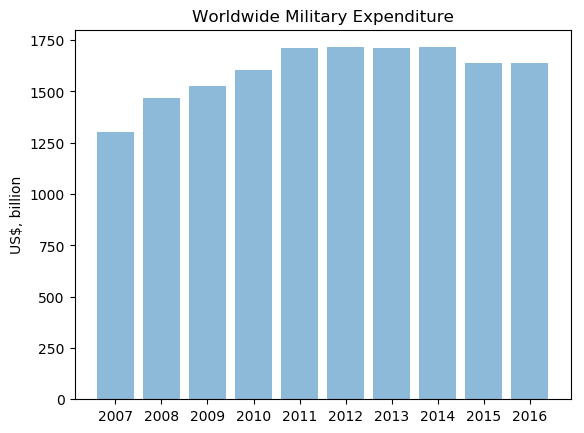

In [13]:
# Plot the bar graph for military spending for the decade

plt.rcdefaults()
objects = tuple(military_spending_data.columns)
y_pos = np.arange(len(objects))
spendingAmount = list(military_spending_data.loc['Total Worldwide'])

 
plt.bar(y_pos, spendingAmount, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel( 'US$, billion')
plt.title('Worldwide Military Expenditure')
 
plt.show()

In [14]:
# Calculate increase in military spend from 2015 to 2016

military_spend_2016 = military_spending_data.loc['Total Worldwide','2016']

military_spend_2015 = military_spending_data.loc['Total Worldwide','2015'] 


increase_in_spending_2016 = (military_spend_2016 - military_spend_2015) / military_spend_2015 * 100

print("Increase in spending percent: "+str(increase_in_spending_2016))

Increase in spending percent: 0.13131237452282382


In [15]:
# Sort the data on the basis of military sepnding of the most recent year i.e. 2016

military_spending_in_usd_sorted = military_spending_in_usd.sort_values(by='2016',ascending=False)

In [16]:
# Check first few rows of the sorted dataset

military_spending_in_usd_sorted.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region,Continent
Country,,,,,,,,,,,,
USA,556.961,621.131,668.567,698.18,711.338,684.78,639.704,609.914,596.01,611.186,North America,America
"China, P.R.",68.012,86.362,105.644,115.712,137.967,157.39,179.88,200.772,214.093,215.176,East Asia,Asia & Oceania
Ukraine,43.535,56.184,51.532,58.72,70.238,81.469,88.353,84.697,66.419,69.245,Eastern Europe,Europe
Turkey,35.47,38.223,41.267,45.245,48.531,56.498,67.02,80.762,87.186,63.673,Middle East,Middle East
India,28.255,33.002,38.722,46.09,49.634,47.217,47.404,50.914,51.295,55.923,South Asia,Asia & Oceania


In [17]:
# Select top 10 military spending nations in 2016

military_spending_in_usd_2016_top10 = military_spending_in_usd_sorted.iloc[0:10,9]

military_spending_in_usd_2016_top10

Country
USA            611.186
China, P.R.    215.176
Ukraine         69.245
Turkey          63.673
India           55.923
Greece          55.745
Egypt           48.253
Japan           46.126
Iceland         41.067
South Korea     36.777
Name: 2016, dtype: object

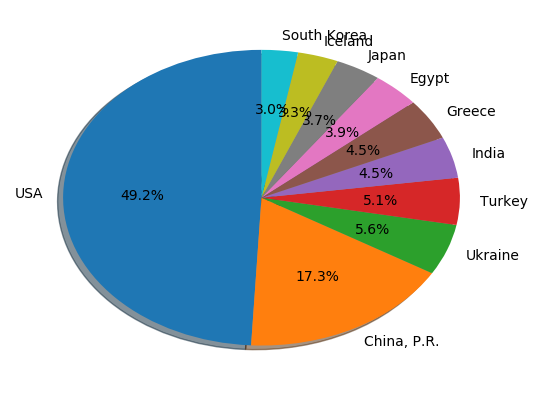

In [18]:
# Draw a pie chart which shows the military spend as a percentage of military spend by top 10 nations

labels = list(military_spending_in_usd_2016_top10.index)

plt.pie(military_spending_in_usd_2016_top10, labels=labels, autopct='%3.1f%%',
        shadow=True, startangle=90)
plt.show()

In [19]:
# Find region-wise military spending for last two years by using groupby and aggregate function sum

military_spending_2016_regionwise = military_spending_in_usd.groupby('Region')['2016'].sum()
military_spending_2015_regionwise = military_spending_in_usd.groupby('Region')['2015'].sum()

In [20]:
# Sort the data index-wise

military_spending_2016_regionwise = military_spending_2016_regionwise.sort_index()
military_spending_2015_regionwise = military_spending_2015_regionwise.sort_index()

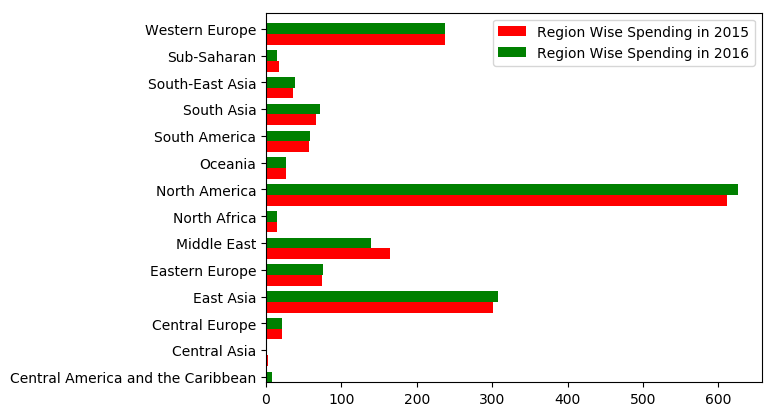

In [21]:
# Plot the graph showing comparative continent-wise military spending for last two years

plt.rcdefaults()

labels =list(military_spending_2015_regionwise.index)

y1 = list(military_spending_2015_regionwise.values)

y2 = list(military_spending_2016_regionwise.values)

df = pd.DataFrame(dict(graph=labels, n=y1, m=y2)) 

ind = np.arange(len(df))
width = 0.4


fig, ax = plt.subplots()
ax.barh(ind, df.n, width, color='red', label='Region Wise Spending in 2015')
ax.barh(ind + width, df.m, width, color='green', label='Region Wise Spending in 2016')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[3*width - 1, len(df)])
ax.legend()


plt.show()

In [22]:
# Find total military spending region-wise for last two years

military_expenditure_2015_2016 = military_spending_in_usd.groupby('Region')[['2015','2016']].sum()

# Find abosolute change in military spending by taking difference of columns

military_expenditure_2015_2016['Change in military expenditure'] = np.diff(military_expenditure_2015_2016.values, axis=1) 

# Find percent change in expenditure in 2016 over 2015

military_expenditure_2015_2016['Percent Change in expenditure'] = military_expenditure_2015_2016.iloc[:,2]*100/military_expenditure_2015_2016.iloc[:,0]

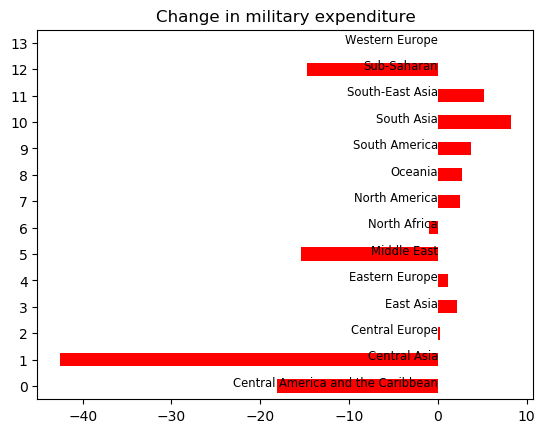

In [23]:
# Plot a graph which shows change in military expenditure region-wise in 2016 over previous year 

df = pd.DataFrame({'change': list(military_expenditure_2015_2016.loc[:,'Percent Change in expenditure']),
                   'region':list(military_expenditure_2015_2016.index)})

ax = plt.subplot(111)

df.change.plot(ax=ax, kind='barh', color=list('rgbrgbrgrgbrgb'), title='Change in military expenditure')

for i, x in enumerate(df.region):
    ax.text(0, i, x, ha='right', fontsize='small')
    

plt.show()

In [24]:
# Find continent-wise military spending for last two years by using groupby and aggregate function sum

military_spending_2016_continentwise = military_spending_in_usd.groupby('Continent')['2016'].sum()
military_spending_2015_continentwise = military_spending_in_usd.groupby('Continent')['2015'].sum()

military_spending_2016_continentwise = military_spending_2016_continentwise.sort_index()
military_spending_2015_continentwise = military_spending_2015_continentwise.sort_index()

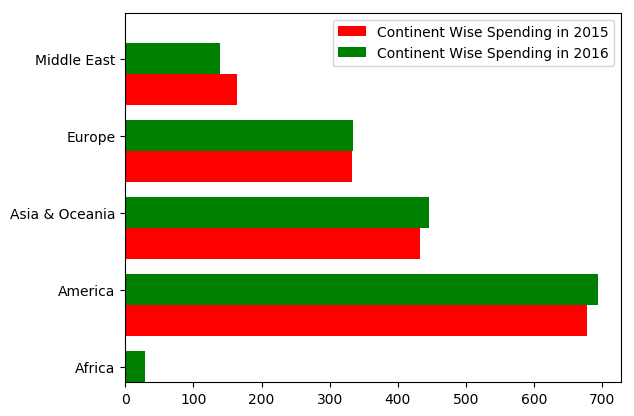

In [25]:
# Plot the graph showing comparative continent-wise military spending for last two years

labels =list(military_spending_2015_continentwise.index)

y = list(military_spending_2015_continentwise.values)

z = list(military_spending_2016_continentwise.values)

df = pd.DataFrame(dict(graph=labels,
                           n=y, m=z)) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df.n, width, color='red', label='Continent Wise Spending in 2015')
ax.barh(ind + width, df.m, width, color='green', label='Continent Wise Spending in 2016')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[3*width - 1, len(df)])
ax.legend()



plt.show()

In [261]:
# Find total, change and percentage of military spending continent-wise for last two years

military_expenditure_continetwise_2015_2016 = military_spending_in_usd.groupby('Continent')[['2015','2016']].sum()
military_expenditure_continetwise_2015_2016['Change in military expenditure'] = np.diff(military_expenditure_continetwise_2015_2016.values, axis=1) 
military_expenditure_continetwise_2015_2016['Percent Change in expenditure'] = military_expenditure_continetwise_2015_2016.iloc[:,2]*100/military_expenditure_continetwise_2015_2016.iloc[:,0]

military_expenditure_continetwise_2015_2016

,2015,2016,Change in military expenditure,Percent Change in expenditure
Continent,,,,
Africa,31.2846,28.7036,-2.5810,-8.250066
America,677.5614,692.9621,15.4007,2.272960
Asia & Oceania,432.1755,445.8023,13.6268,3.153071
Europe,332.5714,333.6324,1.0610,0.319029
Middle East,164.1050,138.7480,-25.3570,-15.451693


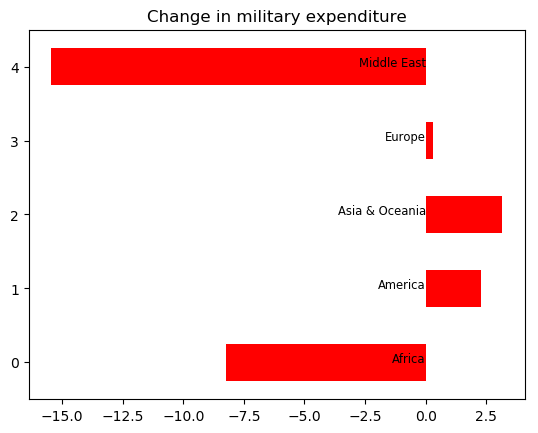

In [302]:
# Plot a graph which shows change in military expenditure continent-wise in 2016 over previous year

df = pd.DataFrame({'change': list(military_expenditure_continetwise_2015_2016.loc[:,'Percent Change in expenditure']),
                   'region':list(military_expenditure_continetwise_2015_2016.index)})

ax = plt.subplot(111)

df.change.plot(ax=ax, kind='barh', color='red', title='Change in military expenditure')

for i, x in enumerate(df.region):
    ax.text(0, i , x, ha='right', fontsize='small')
    
plt.show()